In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from lmfit.models import ExponentialModel, GaussianModel
from matplotlib import cm

data10keV = pd.read_csv('VACANCY10.csv')
data30keV = pd.read_csv('VACANCY30.csv')
data50keV = pd.read_csv('VACANCY50.csv')
data70keV = pd.read_csv('VACANCY70.csv')
data90keV = pd.read_csv('VACANCY90.csv')
fine10keV = pd.read_csv('RANGE10.csv')
fine30keV = pd.read_csv('RANGE30.csv')
fine50keV = pd.read_csv('RANGE50.csv')
fine70keV = pd.read_csv('RANGE70.csv')
fine90keV = pd.read_csv('RANGE90.csv')

In [7]:
def plot3dVacancy(DEPTH,data,thickness,lab, ax,c):
    if lab == 1:
        ax.plot(DEPTH, data,  linestyle = '--', lw = 2, color = c, label = 'V ('+str(thickness)+' keV)')
    else:
        ax.plot(DEPTH, data,  linestyle = '--', lw = 2, color = c)

    
    ax.fill_between(DEPTH, 0, data, color = c, step='mid', alpha=0.1) 



In [8]:
def plot3dSilicon(DEPTH,data,thickness,c, ax, lab):
    if lab == 1:
        ax.plot(DEPTH, data, lw = 2, color = c, label = 'Si$^+$ ('+str(thickness)+' keV)')
    else:
        ax.plot(DEPTH, data, lw = 2, color = c)
        # ax.plot(DEPTH, data, lw = 2.5, color = 'aqua')

In [9]:
cmap = cm.viridis  # You can choose a different colormap
colors = [cmap(i / 5) for i in range(5)]

cmap = cm.gray # You can choose a different colormap
colors2 = [cmap(i / 5) for i in range(5)]

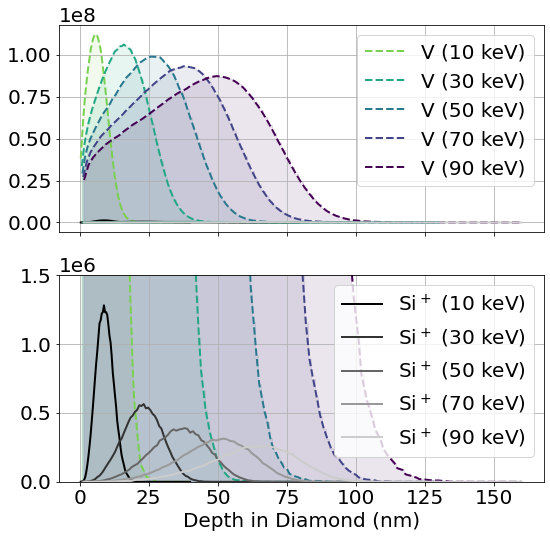

In [10]:
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
fig, axs = plt.subplots(2,1,figsize=(20*cm, 20*cm), sharex=True, gridspec_kw={'height_ratios': [1, 1]})
# fig, axs = plt.subplots(2,1,figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [4, 5]})
axs[0].grid()
# axs[0].set_xlim(0, 80)
# axs[0].set_xlabel('Depth in Diamond (nm)')
# axs[0].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')
# fig.text(0.0, 0.5, 'Density per Dose ($cm^{-3}$/$cm^{-2}$)', va='center', rotation='vertical')

# plot3dSilicon(fine10keV['DEPTH'],fine10keV['Si'], 10, 'C0', axs[0])
# plot3dSilicon(fine30keV['DEPTH'],fine30keV['Si'], 30,'C1', axs[0])
# plot3dSilicon(fine50keV['DEPTH'],fine50keV['Si'],50,'C2', axs[0])
# plot3dSilicon(fine70keV['DEPTH'],fine70keV['Si'], 70,'C3', axs[0])
# plot3dSilicon(fine90keV['DEPTH'],fine90keV['Si'], 90,'C4', axs[0])


plot3dVacancy(data10keV['DEPTH']/10,data10keV['C']*1e8, 10,1, axs[0], colors[4])
plot3dVacancy(data30keV['DEPTH']/10,data30keV['C']*1e8, 30,1, axs[0], colors[3])
plot3dVacancy(data50keV['DEPTH']/10,data50keV['C']*1e8,50,1, axs[0], colors[2])
plot3dVacancy(data70keV['DEPTH']/10,data70keV['C']*1e8, 70,1, axs[0], colors[1])
plot3dVacancy(data90keV['DEPTH']/10,data90keV['C']*1e8, 90,1, axs[0], colors[0])

plot3dSilicon(fine10keV['DEPTH']/10,fine10keV['Si'], 10, colors2[0], axs[0], 0)
plot3dSilicon(fine30keV['DEPTH']/10,fine30keV['Si'], 30,colors2[1], axs[0], 0)
plot3dSilicon(fine50keV['DEPTH']/10,fine50keV['Si'],50,colors2[2], axs[0], 0)
plot3dSilicon(fine70keV['DEPTH']/10,fine70keV['Si'], 70,colors[3], axs[0], 0)
plot3dSilicon(fine90keV['DEPTH']/10,fine90keV['Si'], 90,colors2[4], axs[0], 0)

# axs[0].plot([],[],lw = 2, color = 'aqua', label = 'Si')
# axs[0].plot([],[],lw = 2, color = 'C0', linestyle = '--',label = 'V')
axs[0].legend()

axs[1].grid()
# axs[1].set_xlim(0, 80)
axs[1].set_ylim(0, 1.5e6)
axs[1].set_xlabel('Depth in Diamond (nm)')
# axs[1].set_ylabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

# plot3dVacancy(data10keV['DEPTH'][1:],data10keV['C'][1:]*1e8, 10,1, axs[1])
# plot3dVacancy(data30keV['DEPTH'],data30keV['C']*1e8, 30,0, axs[1])
# plot3dVacancy(data50keV['DEPTH'][4:],data50keV['C'][4:]*1e8,50,0, axs[1])
# plot3dVacancy(data70keV['DEPTH'][1:],data70keV['C'][1:]*1e8, 70,0, axs[1])
# plot3dVacancy(data90keV['DEPTH'][2:],data90keV['C'][2:]*1e8, 90,0, axs[1])
plot3dVacancy(data10keV['DEPTH']/10,data10keV['C']*1e8, 10,0, axs[1], colors[4])
plot3dVacancy(data30keV['DEPTH']/10,data30keV['C']*1e8, 30,0, axs[1], colors[3])
plot3dVacancy(data50keV['DEPTH']/10,data50keV['C']*1e8,50,0, axs[1], colors[2])
plot3dVacancy(data70keV['DEPTH']/10,data70keV['C']*1e8, 70,0, axs[1], colors[1])
plot3dVacancy(data90keV['DEPTH']/10,data90keV['C']*1e8, 90,0, axs[1], colors[0])

plot3dSilicon(fine10keV['DEPTH']/10,fine10keV['Si'], 10, colors2[0], axs[1], 1)
plot3dSilicon(fine30keV['DEPTH']/10,fine30keV['Si'], 30,colors2[1], axs[1], 1)
plot3dSilicon(fine50keV['DEPTH']/10,fine50keV['Si'],50,colors2[2], axs[1], 1)
plot3dSilicon(fine70keV['DEPTH']/10,fine70keV['Si'], 70,colors2[3], axs[1], 1)
plot3dSilicon(fine90keV['DEPTH']/10,fine90keV['Si'], 90,colors2[4], axs[1], 1)



axs[1].legend()
fig.tight_layout()


fig.savefig('siliconImplantation.pdf', format= 'pdf')